### Q05 Implement Feature scaling( standardization, normalization) and Feature Selection methods (SelectFromModel, SequentialForwardSelector, SelectKBest) using scikitlearn.

In [1]:
from sklearn.datasets import load_wine
wine=load_wine()
x=wine.data
y=wine.target
print(x.shape)
print(y.shape)

(178, 13)
(178,)


In [2]:
print(x)
print(y)

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [3]:
import numpy as np
print(np.unique(y))

[0 1 2]


In [4]:
print((y==0).sum())
print((y==1).sum())
print((y==2).sum())

59
71
48


In [5]:
import pandas as pd
df1=pd.DataFrame(x)
df2=pd.DataFrame(y,columns=['target'])
df=pd.concat([df1,df2],axis=1)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


<Axes: xlabel='target', ylabel='count'>

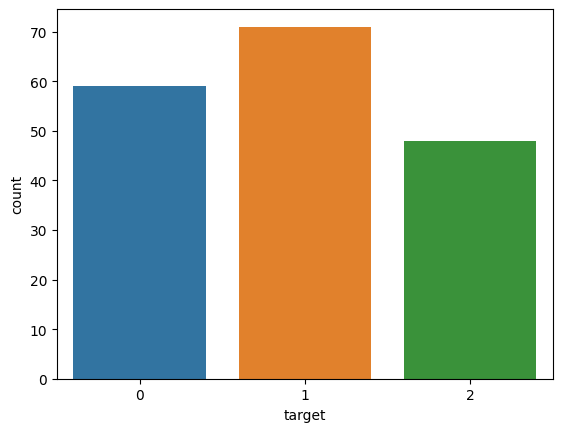

In [6]:
import seaborn as sns
sns.countplot(x=df['target'])

In [7]:
df.isna().sum()

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
target    0
dtype: int64

In [8]:
df.info #Categorical data

<bound method DataFrame.info of          0     1     2     3      4     5     6     7     8      9    10  \
0    14.23  1.71  2.43  15.6  127.0  2.80  3.06  0.28  2.29   5.64  1.04   
1    13.20  1.78  2.14  11.2  100.0  2.65  2.76  0.26  1.28   4.38  1.05   
2    13.16  2.36  2.67  18.6  101.0  2.80  3.24  0.30  2.81   5.68  1.03   
3    14.37  1.95  2.50  16.8  113.0  3.85  3.49  0.24  2.18   7.80  0.86   
4    13.24  2.59  2.87  21.0  118.0  2.80  2.69  0.39  1.82   4.32  1.04   
..     ...   ...   ...   ...    ...   ...   ...   ...   ...    ...   ...   
173  13.71  5.65  2.45  20.5   95.0  1.68  0.61  0.52  1.06   7.70  0.64   
174  13.40  3.91  2.48  23.0  102.0  1.80  0.75  0.43  1.41   7.30  0.70   
175  13.27  4.28  2.26  20.0  120.0  1.59  0.69  0.43  1.35  10.20  0.59   
176  13.17  2.59  2.37  20.0  120.0  1.65  0.68  0.53  1.46   9.30  0.60   
177  14.13  4.10  2.74  24.5   96.0  2.05  0.76  0.56  1.35   9.20  0.61   

       11      12  target  
0    3.92  1065.0       0  

In [9]:
df.describe

<bound method NDFrame.describe of          0     1     2     3      4     5     6     7     8      9    10  \
0    14.23  1.71  2.43  15.6  127.0  2.80  3.06  0.28  2.29   5.64  1.04   
1    13.20  1.78  2.14  11.2  100.0  2.65  2.76  0.26  1.28   4.38  1.05   
2    13.16  2.36  2.67  18.6  101.0  2.80  3.24  0.30  2.81   5.68  1.03   
3    14.37  1.95  2.50  16.8  113.0  3.85  3.49  0.24  2.18   7.80  0.86   
4    13.24  2.59  2.87  21.0  118.0  2.80  2.69  0.39  1.82   4.32  1.04   
..     ...   ...   ...   ...    ...   ...   ...   ...   ...    ...   ...   
173  13.71  5.65  2.45  20.5   95.0  1.68  0.61  0.52  1.06   7.70  0.64   
174  13.40  3.91  2.48  23.0  102.0  1.80  0.75  0.43  1.41   7.30  0.70   
175  13.27  4.28  2.26  20.0  120.0  1.59  0.69  0.43  1.35  10.20  0.59   
176  13.17  2.59  2.37  20.0  120.0  1.65  0.68  0.53  1.46   9.30  0.60   
177  14.13  4.10  2.74  24.5   96.0  2.05  0.76  0.56  1.35   9.20  0.61   

       11      12  target  
0    3.92  1065.0       0

In [10]:
df['target'].value_counts()

target
1    71
0    59
2    48
Name: count, dtype: int64

In [11]:
df.describe().T #Print statistical property

,count,mean,std,min,25%,50%,75%,max
0,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
1,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
2,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
3,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
4,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
5,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
6,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
7,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
8,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
9,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
print(x.shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(178, 13)
(124, 13)
(54, 13)
(124,)
(54,)


###  Feature Scaling
1. Standardization
2. Nomalization

In [13]:
# Method-1 ,Standardization
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_std=sc.fit_transform(x_train)
x_test_std=sc.transform(x_test)

In [14]:
# Method-2, N ormalization
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
x_train_mms=mms.fit_transform(x_train)
x_test_mms=mms.transform(x_test)

## Feature Selection

In [15]:
# Method-1 [SelectKBest]
from sklearn.datasets import load_digits
x,y=load_digits(return_X_y=True)
print(x.shape)

(1797, 64)


In [16]:
from sklearn.feature_selection import SelectKBest,chi2
x_new=SelectKBest(chi2,k=20).fit_transform(x,y)
print(x_new.shape)

(1797, 20)


In [17]:
# Method-2 [Sequential Forward/feature Selection ]
from sklearn.feature_selection  import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
x_new2=SequentialFeatureSelector(knn,n_features_to_select=10).fit_transform(x,y)
print(x_new2.shape)

(1797, 10)


Text(0, 0.5, 'Importance')

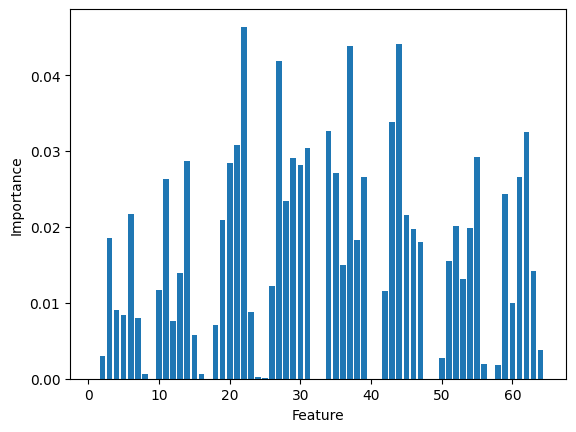

In [19]:
#Method-3 [SelectFromModel]
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
rf=RandomForestClassifier(n_estimators=50)
rf.fit(x,y)
rf.feature_importances_
plt.bar(np.arange(1,len(rf.feature_importances_)+1),rf.feature_importances_)
plt.xlabel('Feature')
plt.ylabel('Importance')


In [20]:
from sklearn.feature_selection import SelectFromModel
x_new =SelectFromModel(rf,max_features=10,prefit=True).transform(x)
print(x_new.shape)

(1797, 10)
